<a href="https://colab.research.google.com/github/StellaIbeh/ML-pipeline-Summative-/blob/main/Diabetes_Prediction_MLp_Summative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
import joblib
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold, cross_validate
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch







In [ ]:
# Saving my model in Drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:

path = "/content/drive/MyDrive/diabetes.csv"




In [ ]:
def load_data(path):
  return pd.read_csv(path)

In [ ]:
df = load_data(path)
pd.set_option('display.max_columns', 1000)

df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# for cleaniness in further plots, all float types are converted to int
df = df.astype(int)
# Assuming 'Outcome' is the column you're interested in, replace 'Outcome' with the actual column name
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0              6      148             72             35        0   33   
1              1       85             66             29        0   26   
2              8      183             64              0        0   23   
3              1       89             66             23       94   28   
4              0      137             40             35      168   43   
..           ...      ...            ...            ...      ...  ...   
763           10      101             76             48      180   32   
764            2      122             70             27        0   36   
765            5      121             72             23      112   26   
766            1      126             60              0        0   30   
767            1       93             70             31        0   30   

     DiabetesPedigreeFunction  Age  Outcome  
0                           0   50        1  
1                           0   31        0  
2                           0   32        1  
3                           0   21        0  
4                           2   33        1  
..                        ...  ...      ...  
763                         0   63        0  
764                         0   27        0  
765                         0   30        0  
766                         0   47        1  
767                         0   23        0  

[768 rows x 9 columns]>

In [ ]:


# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

# Split into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Automatically create the folders if they don't exist
os.makedirs("data/train", exist_ok=True)
os.makedirs("data/test", exist_ok=True)

# Save the training and testing datasets into respective folders
train_data.to_csv("data/train/diabetes_train.csv", index=False)
test_data.to_csv("data/test/diabetes_test.csv", index=False)

print("Data successfully split and saved into 'data/train' and 'data/test' folders!")


Data successfully split and saved into 'data/train' and 'data/test' folders!


In [ ]:

# define a function to simplify the plots in further sections
def ida_plot(li_col, row, col=3, figsize=(20, 5), palette="Set2"):

    """
    This function return plt subplots by
    looping through the df columns
    display only the desired columns
    """
       # prepare subplot format
    fig, ax = plt.subplots(row, col, figsize=figsize)
    axe = ax.ravel()

    # Define a color palette for the bar charts
    colors = sns.color_palette("Set2", len(li_col))

    # use for loop to plot
    for i in range(len(li_col)):

        # create bar charts for each column
        sns.countplot(x=df[li_col[i]], ax=axe[i], palette=palette)

    # adjust the spacing of the subplots
    plt.subplots_adjust(
        wspace=0.5,
        hspace=0.5
    )

<ipython-input-12-e5a09eaa4085>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Outcome', palette="Set2")


<Axes: xlabel='Outcome', ylabel='count'>

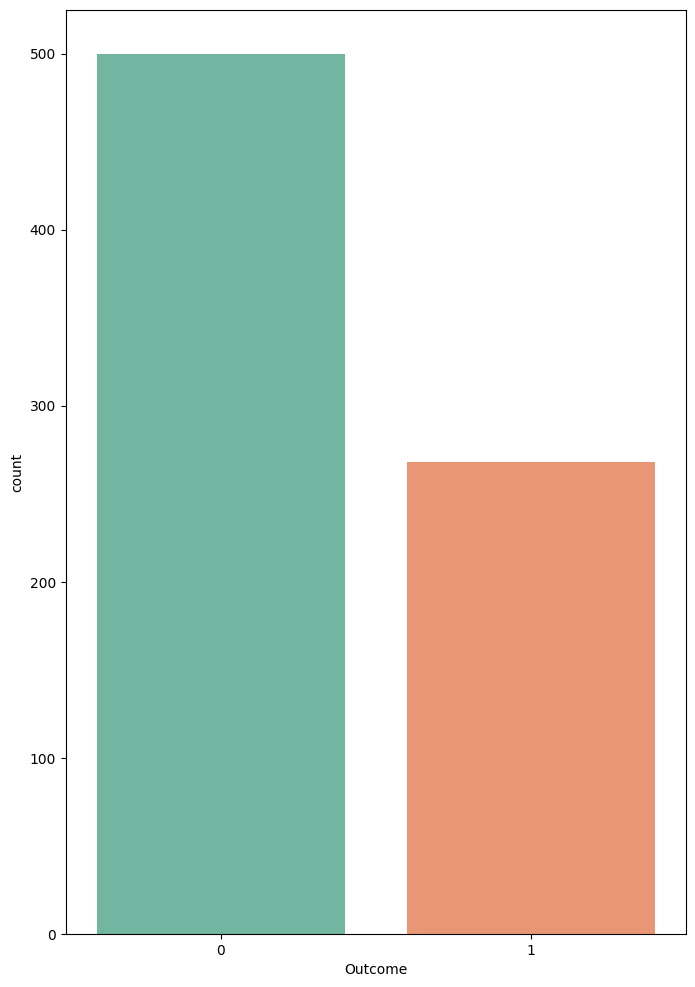

In [ ]:

# plot classes
fig, ax = plt.subplots(figsize=(8, 12))
sns.countplot(data=df, x='Outcome', palette="Set2")

In [ ]:
#Describe the plot
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.548177,0.071615,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.860602,0.277494,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.000000,0.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.000000,0.000000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.000000,2.000000,81.000000,1.000000


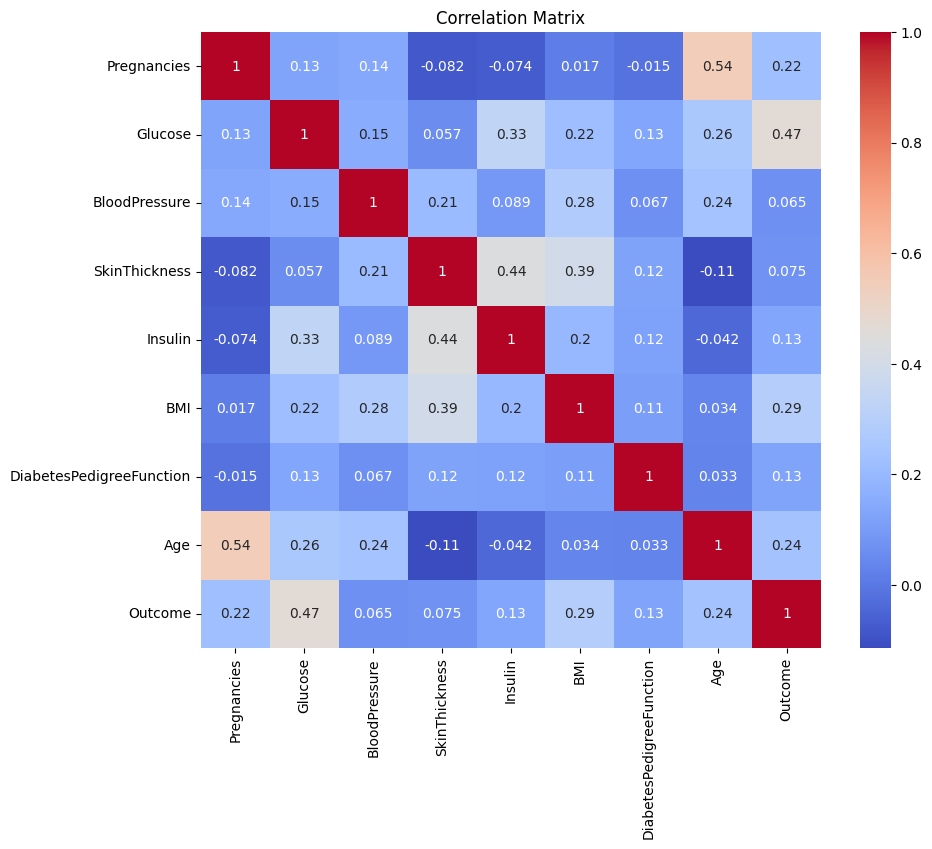

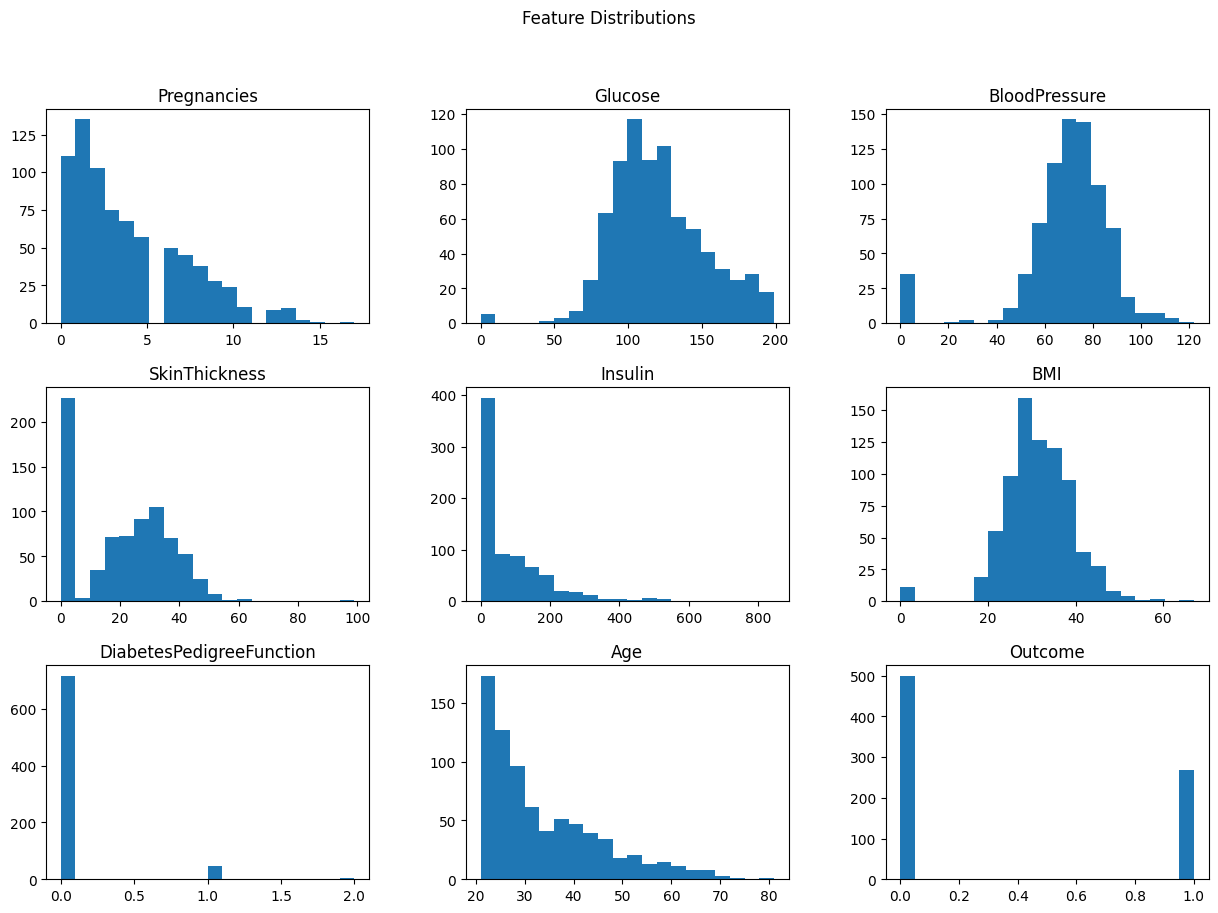

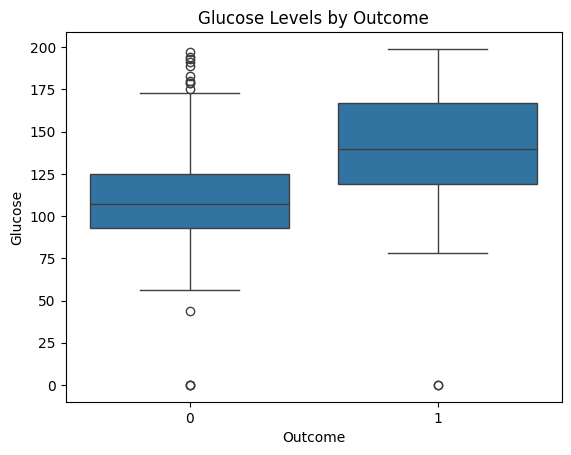

In [ ]:
# Visualize correlations between features


# Assuming 'df' is your DataFrame, replace 'data' with 'df'
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # Changed 'data' to 'df'
plt.title('Correlation Matrix')
plt.show()

# Visualize distribution of each feature
df.hist(bins=20, figsize=(15, 10), grid=False)  # Changed 'data' to 'df'
plt.suptitle('Feature Distributions')
plt.show()

# Compare glucose levels based on Outcome
sns.boxplot(x='Outcome', y='Glucose', data=df)  # Changed 'data' to 'df'
plt.title('Glucose Levels by Outcome')
plt.show()

Data Preprocessing


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def preprocess_data(data):
    # Handle missing values
    data = data.fillna(method='ffill')

    # Encode categorical variables (if any)
    data = pd.get_dummies(data, drop_first=True)

    # Scale numerical features
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    return data_scaled


In [ ]:
# Define the feature set and the target variable
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']  # Target
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


# Identify numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Create the preprocessing steps
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ])


# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k='all')

# Combine preprocessing and feature selection
from sklearn.pipeline import Pipeline
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', selector)
])

Training set shape: (614, 8)
Testing set shape: (154, 8)
Feature Importance:
                         feature       score
1                   num__Glucose  182.554724
5                       num__BMI   61.159924
7                       num__Age   37.629617
0               num__Pregnancies   27.722942
6  num__DiabetesPedigreeFunction   17.194683
4                   num__Insulin   16.957174
3             num__SkinThickness    5.431117
2             num__BloodPressure    4.181986


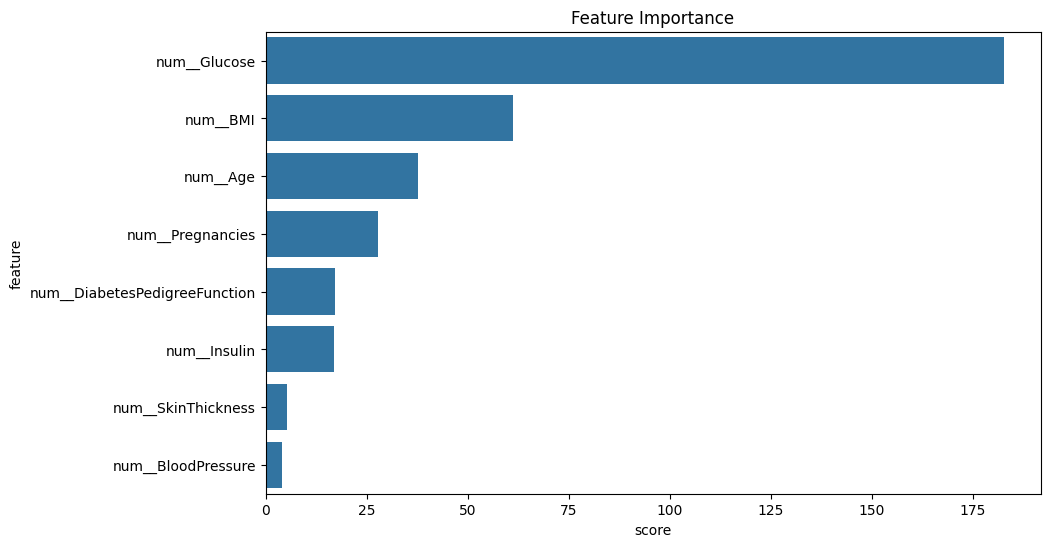

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply preprocessing
X_train_processed = preprocessing_pipeline.fit_transform(X_train, y_train)
X_test_processed = preprocessing_pipeline.transform(X_test)

# Display the shapes of the train and test sets
print(f'Training set shape: {X_train_processed.shape}')
print(f'Testing set shape: {X_test_processed.shape}')

# Display feature importance
feature_scores = preprocessing_pipeline.named_steps['selector'].scores_
feature_names = preprocessing_pipeline.named_steps['preprocessor'].get_feature_names_out()
feature_importance = pd.DataFrame({'feature': feature_names, 'score': feature_scores})
feature_importance = feature_importance.sort_values('score', ascending=False)
print("Feature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [ ]:
# Save the preprocessing pipeline
import joblib
filename = 'preprocessing_pipeline.pkl'
joblib.dump(preprocessing_pipeline, filename)

['preprocessing_pipeline.pkl']

In [ ]:

def train_model(data, target):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(data.drop(target, axis=1), data[target], test_size=0.2, random_state=42)

    # Train model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc}")

    # Save model
    with open('../models/model.pkl', 'wb') as f:
        pickle.dump(model, f)

    return model


Train the ML Pipeline Model


In [ ]:
# Train the initial MLP Model

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, solver='adam', random_state=42)

# Perform stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(mlp, X_train_processed, y_train, cv=skf)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# Train the model
try:
    mlp.fit(X_train_processed, y_train)
    print("Model trained successfully.")

    # Add loss metric calculation
    train_loss = mlp.loss_
    print(f"Training Loss: {train_loss:.4f}")
except Exception as e:
    print(f"An error occurred during model training: {str(e)}")
    # Make predictions
y_pred = mlp.predict(X_test_processed)

# Display classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Train and evaluate Logistic Regression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_processed, y_train)
log_reg_pred = log_reg.predict(X_test_processed)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))

# Train and evaluate Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_processed, y_train)
dt_pred = dt.predict(X_test_processed)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Cross-validation scores: [0.76422764 0.7804878  0.7804878  0.7804878  0.76229508]
Mean CV score: 0.774 (+/- 0.017)
Model trained successfully.
Training Loss: 0.3805
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       100
           1       0.62      0.54      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.72      0.72       154

Confusion Matrix:
 [[82 18]
 [25 29]]
Accuracy Score: 0.7207792207792207
Logistic Regression Accuracy: 0.7142857142857143
Decision Tree Accuracy: 0.7207792207792207


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Saving the model as a .pkl file

In [ ]:

# Save the initial model
try:
    model_filename = '/content/drive/My Drive/diabetes.csv/mlp_model.pkl'
    joblib.dump(mlp, model_filename)
    print(f"Model saved to {model_filename}")
except Exception as e:
    print(f"An error occurred while saving the model: {str(e)}")


An error occurred while saving the model: [Errno 20] Not a directory: '/content/drive/My Drive/diabetes.csv/mlp_model.pkl'


Plot Learning Curves and Confusion Matrix

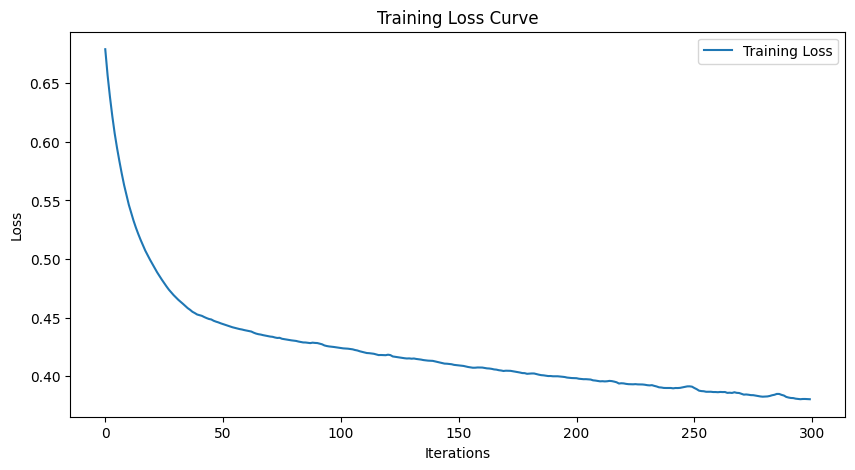

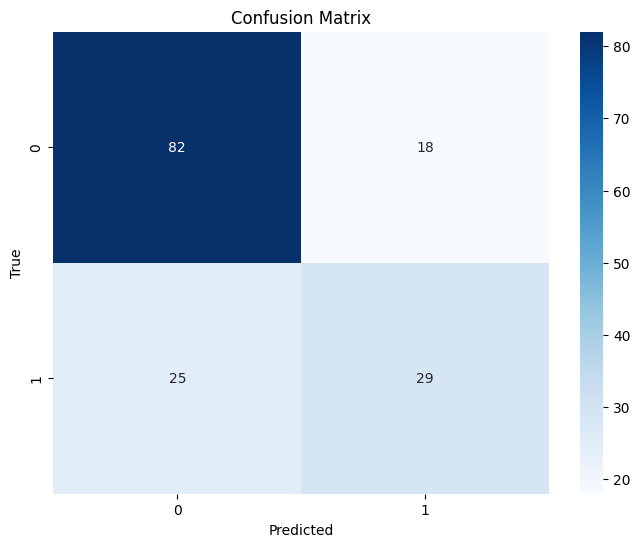

In [ ]:
# Plot Learning Curves and Confusion Matrix

# Plot learning curves
plt.figure(figsize=(10, 5))
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()









HyperParameter Tuning


In [ ]:
# Hyperparameter Tuning

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Initialize the GridSearchCV object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=MLPClassifier(max_iter=1000, random_state=42), param_grid=param_grid, n_jobs=-1, cv=skf
                           , verbose=2)


# Fit the grid search to the data
try:
    grid_search.fit(X_train_processed, y_train)
    print("Grid search completed successfully.")
except Exception as e:
    print(f"An error occurred during grid search: {str(e)}")

    # Display the best parameters and best score
    print("Best parameters found: ", grid_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_processed)

print("Classification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_best))
print("Accuracy Score (Best Model):", accuracy_score(y_test, y_pred_best))










Fitting 5 folds for each of 48 candidates, totalling 240 fits
Grid search completed successfully.
Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.76      0.81      0.79       100
           1       0.60      0.54      0.57        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.68       154
weighted avg       0.71      0.71      0.71       154

Confusion Matrix (Best Model):
 [[81 19]
 [25 29]]
Accuracy Score (Best Model): 0.7142857142857143


Save The Model


In [ ]:

# Save the best model
best_model_filename = '/content/drive/My Drive/best_model.pkl'
joblib.dump(best_model, best_model_filename)
print(f"Best model saved to {best_model_filename}")

# Save the preprocessing pipeline (which includes the scaler)
pipeline_filename = '/content/drive/My Drive/preprocessing_pipeline.pkl'
joblib.dump(preprocessing_pipeline, pipeline_filename)
print(f"Preprocessing pipeline saved to {pipeline_filename}")

Best model saved to /content/drive/My Drive/best_model.pkl
Preprocessing pipeline saved to /content/drive/My Drive/preprocessing_pipeline.pkl


Model Retraining

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

def retrain_model(new_data_path, existing_data_path, model_path, pipeline_path):
    # Load the existing model and preprocessing pipeline
    model = joblib.load(model_path)
    pipeline = joblib.load(pipeline_path)

    # Load the existing and new data
    existing_data = pd.read_csv(existing_data_path)
    new_data = pd.read_csv(new_data_path)

    # Combine existing and new data
    combined_data = pd.concat([existing_data, new_data], ignore_index=True)

    # Prepare the data
    X = combined_data.drop(columns=['Outcome', 'axis = 1'])
    y = combined_data['Outcome']

    # Encode the target variable
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Preprocess the data
    X_train_processed = pipeline.fit_transform(X_train)
    X_test_processed = pipeline.transform(X_test)

    # Retrain the model
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Model retrained with {len(new_data)} new data points.")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", report)
    return model, pipeline
    # Save the retrained model
    joblib.dump(model, model_path)
    print("Retrained model saved successfully.")
    # Save the updated preprocessing pipeline
    joblib.dump(pipeline, pipeline_path)
    print("Updated preprocessing pipeline saved successfully.")
    return model, pipeline


Model Performance Comparison

In [ ]:
# Compare initial and best model performance
print("\nModel Performance Comparison:")
print(f"Initial MLP Model Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Best MLP Model Accuracy: {accuracy_score(y_test, y_pred_best):.3f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, log_reg_pred):.3f}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_pred):.3f}")


Model Performance Comparison:
Initial MLP Model Accuracy: 0.721
Best MLP Model Accuracy: 0.714
Logistic Regression Accuracy: 0.714
Decision Tree Accuracy: 0.721


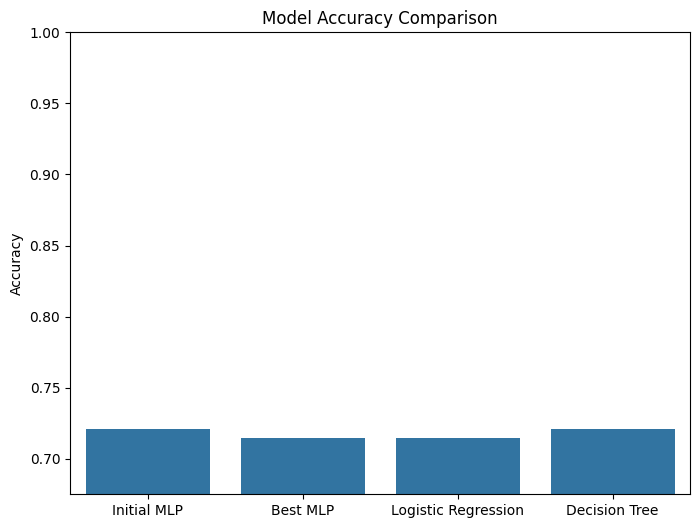

In [ ]:
# Visualize model comparison
models = ['Initial MLP', 'Best MLP', 'Logistic Regression', 'Decision Tree']
accuracies = [accuracy_score(y_test, y_pred),
              accuracy_score(y_test, y_pred_best),
              accuracy_score(y_test, log_reg_pred),
              accuracy_score(y_test, dt_pred)]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.675, 1.0)  # Adjust as needed
plt.show()

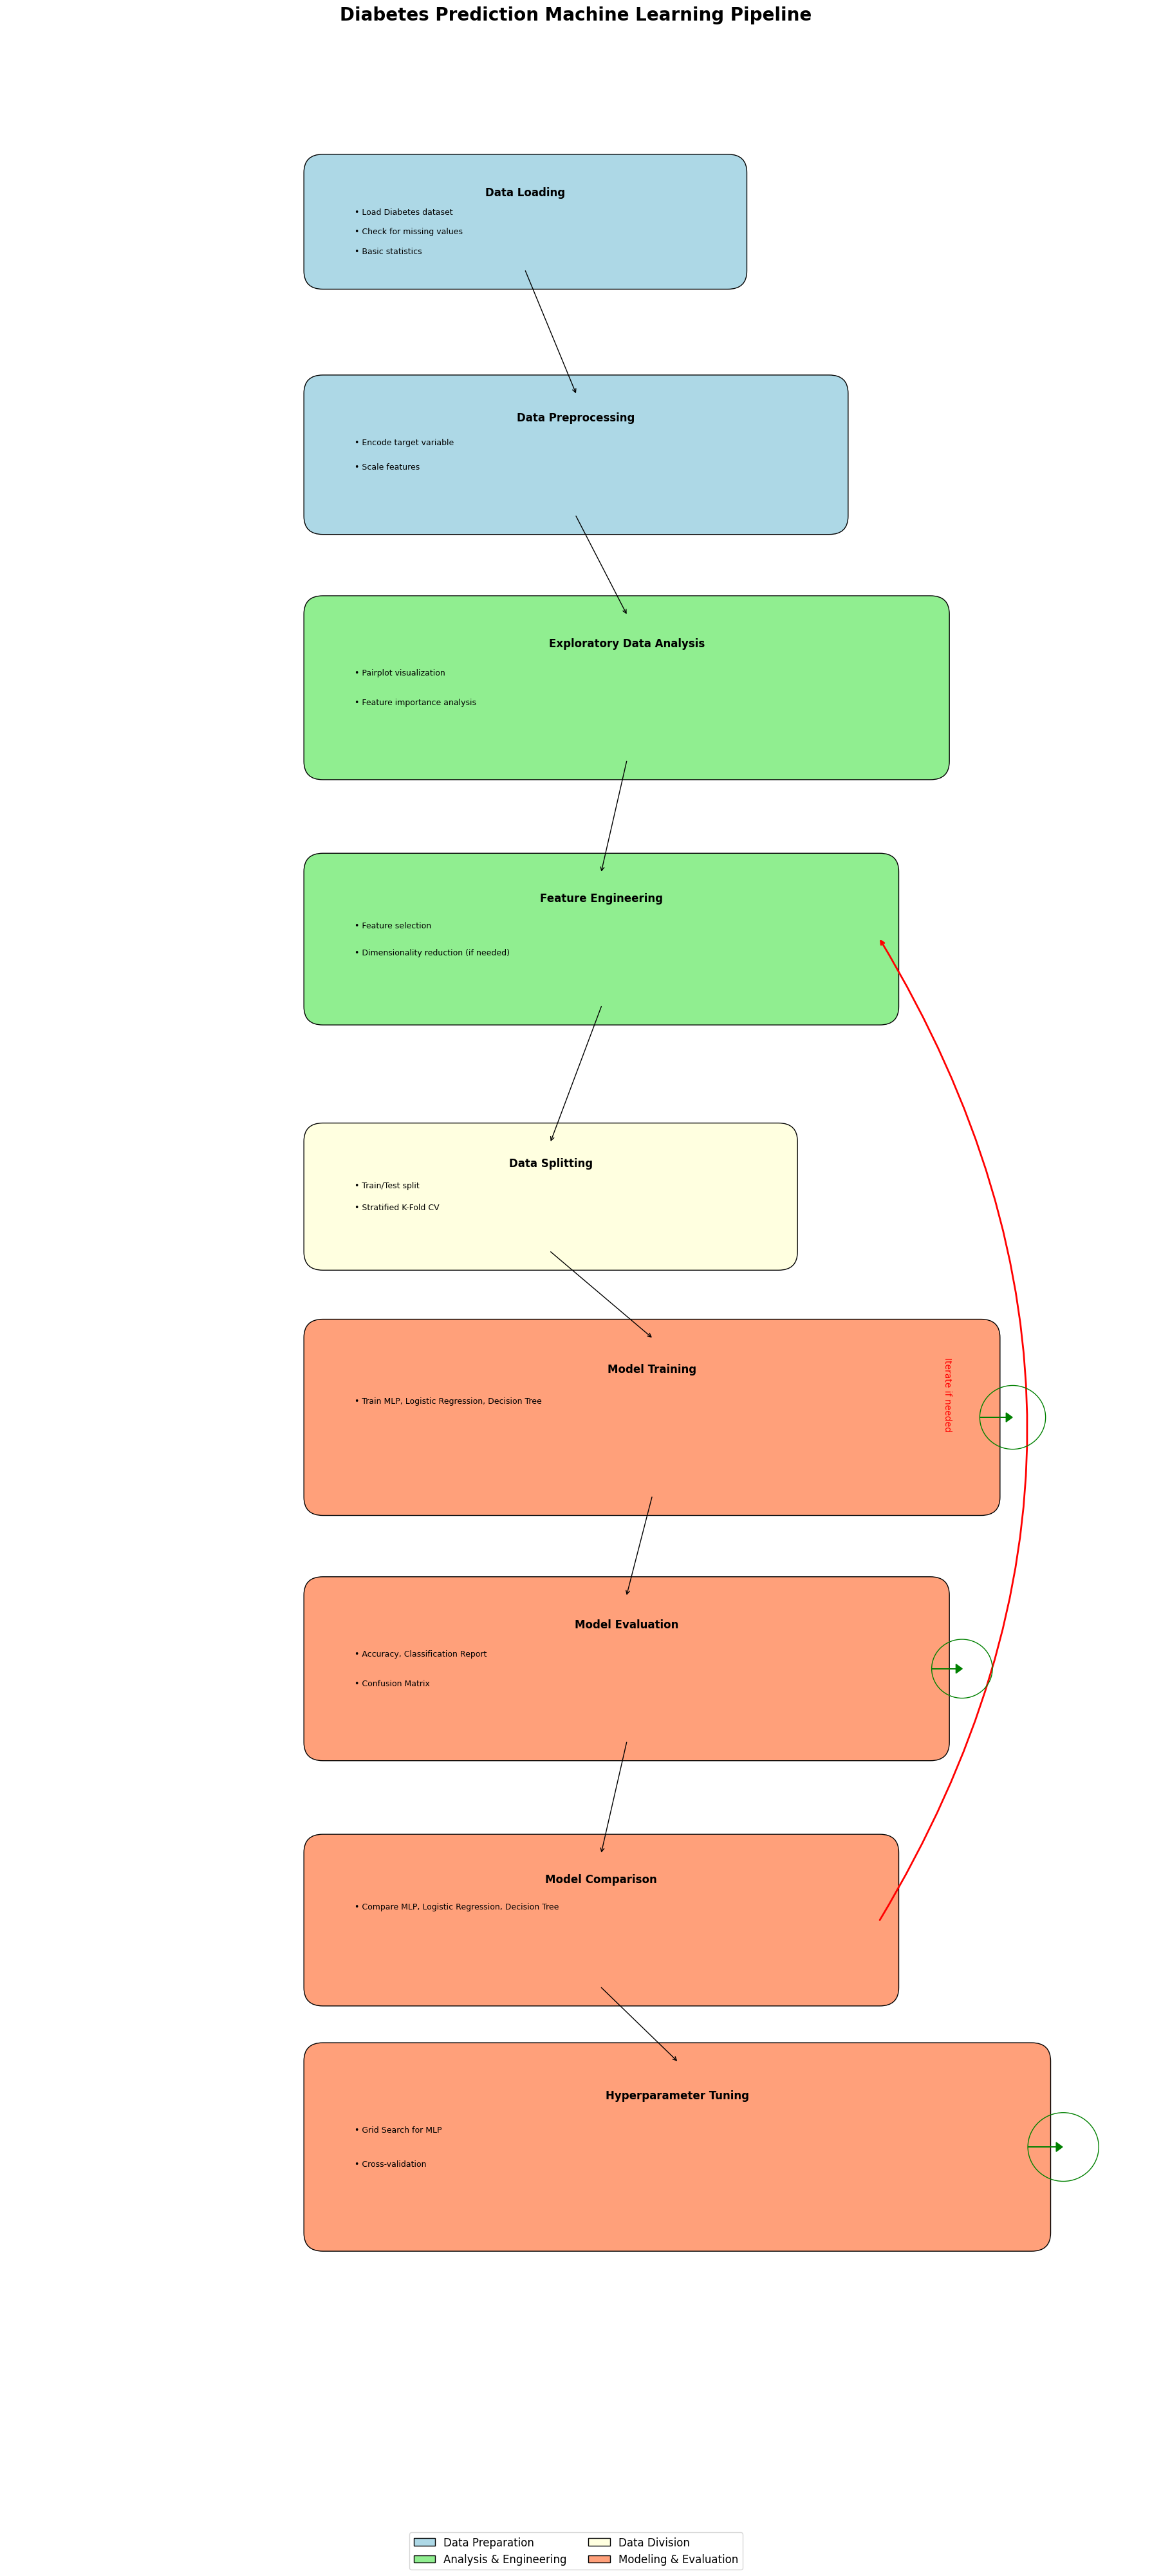

In [ ]:


# Set up the figure and axis
fig, ax = plt.subplots(figsize=(18, 40))
plt.rcParams.update({'font.size': 10})

# Function to add a box with details
def add_box_with_details(ax, text, details, xy, width=8, height=2.5, box_color="lightgrey"):
    box = patches.FancyBboxPatch(xy, width=width, height=height, boxstyle="round,pad=0.3",
                                 facecolor=box_color, edgecolor="black")
    ax.add_patch(box)
    ax.text(xy[0] + width/2, xy[1] + height*0.8, text, ha="center", va="center",
            fontsize=12, fontweight='bold')
    for i, detail in enumerate(details):
        ax.text(xy[0] + 0.5, xy[1] + height*(0.6 - i*0.2), f"• {detail}",
                ha="left", va="center", fontsize=9)
    return box

# Function to add an arrow
def add_arrow(ax, start, end, color='black'):
    arrow = ConnectionPatch(start, end, "data", "data", arrowstyle="->",
                            color=color, connectionstyle="arc3,rad=0")
    ax.add_artist(arrow)

# Function to add iteration arrow
def add_iteration_arrow(ax, box):
    center_x = box.get_x() + box.get_width() + 0.5
    center_y = box.get_y() + box.get_height() / 2
    radius = min(box.get_width(), box.get_height()) / 5
    circle = plt.Circle((center_x, center_y), radius, fill=False, color='green')
    ax.add_artist(circle)
    ax.arrow(center_x - radius, center_y, radius * 0.8, 0, head_width=0.15,
             head_length=0.1, fc='green', ec='green')

# Define steps, details, and complexities
steps = [
    "Data Loading", "Data Preprocessing", "Exploratory Data Analysis",
    "Feature Engineering", "Data Splitting", "Model Training",
    "Model Evaluation", "Model Comparison", "Hyperparameter Tuning"
]

details = {
    "Data Loading": ["Load Diabetes dataset", "Check for missing values", "Basic statistics"],
    "Data Preprocessing": ["Encode target variable", "Scale features"],
    "Exploratory Data Analysis": ["Pairplot visualization", "Feature importance analysis"],
    "Feature Engineering": ["Feature selection", "Dimensionality reduction (if needed)"],
    "Data Splitting": ["Train/Test split", "Stratified K-Fold CV"],
    "Model Training": ["Train MLP, Logistic Regression, Decision Tree"],
    "Model Evaluation": ["Accuracy, Classification Report", "Confusion Matrix"],
    "Model Comparison": ["Compare MLP, Logistic Regression, Decision Tree"],
    "Hyperparameter Tuning": ["Grid Search for MLP", "Cross-validation"]
}

complexities = {
    'Data Loading': 0.8, 'Data Preprocessing': 1.0, 'Exploratory Data Analysis': 1.2,
    'Feature Engineering': 1.1, 'Data Splitting': 0.9, 'Model Training': 1.3,
    'Model Evaluation': 1.2, 'Model Comparison': 1.1, 'Hyperparameter Tuning': 1.4
}

# Define positions
x_position = 5
y_positions = [36, 32, 28, 24, 20, 16, 12, 8, 4]
# Colors for different stages
colors = {
    'Data Loading': 'lightblue', 'Data Preprocessing': 'lightblue',
    'Exploratory Data Analysis': 'lightgreen', 'Feature Engineering': 'lightgreen',
    'Data Splitting': 'lightyellow',
    'Model Training': 'lightsalmon', 'Model Evaluation': 'lightsalmon',
    'Model Comparison': 'lightsalmon', 'Hyperparameter Tuning': 'lightsalmon'
}

# Add boxes and store them in a dictionary
boxes = {}
for step, y in zip(steps, y_positions):
    width = 8 * complexities[step]
    height = 2 * complexities[step]
    boxes[step] = add_box_with_details(ax, step, details[step], (x_position, y), width, height, colors[step])

# Add arrows between boxes
for i in range(len(steps) - 1):
    start = (boxes[steps[i]].get_x() + boxes[steps[i]].get_width() / 2,
             boxes[steps[i]].get_y())
    end = (boxes[steps[i+1]].get_x() + boxes[steps[i+1]].get_width() / 2,
           boxes[steps[i+1]].get_y() + boxes[steps[i+1]].get_height())
    add_arrow(ax, start, end)

# Add feedback loop
feedback_start = (boxes['Model Comparison'].get_x() + boxes['Model Comparison'].get_width(),
                  boxes['Model Comparison'].get_y() + boxes['Model Comparison'].get_height() / 2)
feedback_end = (boxes['Feature Engineering'].get_x() + boxes['Feature Engineering'].get_width(),
                boxes['Feature Engineering'].get_y() + boxes['Feature Engineering'].get_height() / 2)
feedback_arrow = ConnectionPatch(feedback_start, feedback_end, "data", "data",
                                 arrowstyle="->", color="red", connectionstyle="arc3,rad=0.3",
                                 linewidth=2)
ax.add_artist(feedback_arrow)
midpoint_x = (feedback_start[0] + feedback_end[0]) / 2
midpoint_y = (feedback_start[1] + feedback_end[1]) / 2
ax.text(midpoint_x + 1, midpoint_y, "Iterate if needed", color="red", fontsize=10, rotation=-90)

# Add iteration arrows
for step in ['Model Training', 'Model Evaluation', 'Hyperparameter Tuning']:
    add_iteration_arrow(ax, boxes[step])

# Set up the plot
ax.set_xlim(0, 18)
ax.set_ylim(0, 40)
ax.axis('off')
plt.title("Diabetes Prediction Machine Learning Pipeline", fontsize=20, fontweight='bold')

# Add legend
legend_elements = [patches.Patch(facecolor=color, edgecolor='black', label=label)
                   for label, color in [("Data Preparation", "lightblue"),
                                        ("Analysis & Engineering", "lightgreen"),
                                        ("Data Division", "lightyellow"),
                                        ("Modeling & Evaluation", "lightsalmon")]]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.02), ncol=2, fontsize=12)

plt.tight_layout()
plt.show()